In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')

In [1]:
# Read the CSV file into a DataFrame

In [5]:
df = pd.read_csv('message.csv',encoding="ISO-8859-1")

In [6]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


#### Data Exploration

In [2]:
# Drop the 'Unnamed: 0' column and renaming the other ones

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns = ['Label','Text','Label_Number']
df.head()

,Label,Text,Label_Number
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
# Perform data exploration and analysis

In [11]:
df.shape

(5171, 3)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         5171 non-null   object
 1   Text          5171 non-null   object
 2   Label_Number  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [13]:
df.isnull().sum()

Label           0
Text            0
Label_Number    0
dtype: int64

In [14]:
df['Label_Number'].value_counts()

Label_Number
0    3672
1    1499
Name: count, dtype: int64

In [4]:
# Visualize the distribution of labels using a countplot

<Axes: xlabel='Label', ylabel='count'>

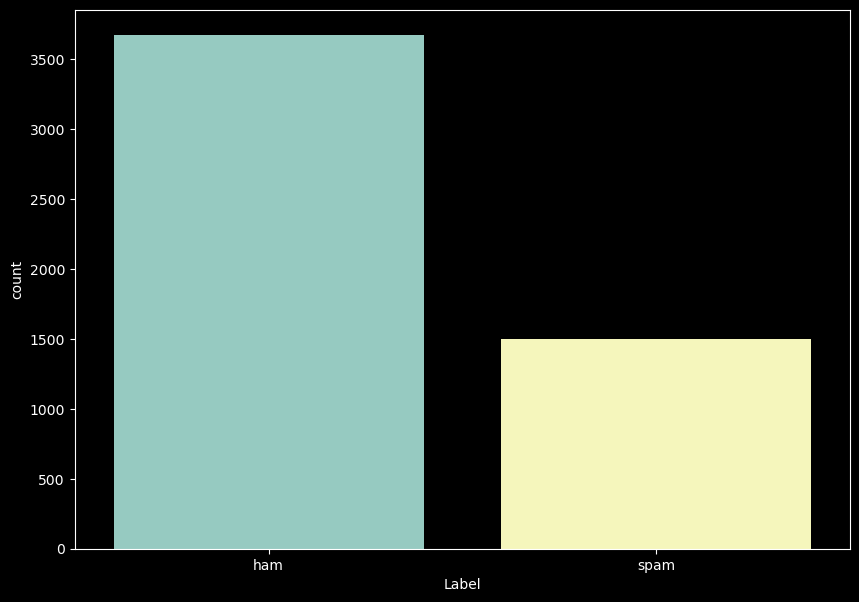

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='Label')

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Tushar
[nltk_data]     Mathur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Define a function to count the number of words in a text
# Apply the count_words function to the 'Text' column and create a new 'count' column

In [17]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)

df['count'] = df['Text'].apply(count_words)
df['count']

0        68
1        24
2       551
3        49
4        71
       ... 
5166    156
5167    306
5168     79
5169    112
5170    200
Name: count, Length: 5171, dtype: int64

In [8]:
# Group the data by 'Label_Number' and calculate the average word count

In [19]:
df.groupby('Label_Number')['count'].mean()

Label_Number
0    226.239107
1    236.387592
Name: count, dtype: float64

In [9]:
# Define a function to clean the text by converting it to lowercase and removing non-alphabetic characters

In [21]:
def clean_str(string,reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

In [10]:
# Clean the 'Text' column using the clean_str function and remove the word subject from text

In [23]:
df['Text'] = df['Text'].apply(lambda string: clean_str(string))

In [24]:
df['Text'] = [' '.join([item for item in x.split() if item not in 'subject']) for x in df['Text']]

In [11]:
# Perform stemming on the 'Text' column using the PorterStemmer from NLTK

In [25]:
from nltk.stem import PorterStemmer

In [26]:
stemmer = PorterStemmer()

In [27]:
def stemming(text):
    return ''.join([stemmer.stem(word) for word in text])

In [28]:
df['Text'] = df['Text'].apply(stemming)

### Perform feature extraction using CountVectorizer

In [29]:
x = df.loc[:,'Text']
y = df.loc[:,'Label_Number']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer()
x = cv.fit_transform(df.Text)
y = df.Label

### Split the data into training and testing sets and Define a dictionary of models to train

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
models = {
    'Random Forest' : {'model':RandomForestClassifier(),'perf':0},
    'Gradient Boosting' : {'model':GradientBoostingClassifier(),'perf':0},
    'MultinomialNB' : {'model':MultinomialNB(),'perf':0},
    'Logisitc Regression' : {'model':LogisticRegression(),'perf':0},
    'KNN' : {'model':KNeighborsClassifier(),'perf':0},
    'Decision Tree' : {'model':DecisionTreeClassifier(),'perf':0},
    'SVM (Linear)' : {'model':LinearSVC(),'perf':0},
    'SVM (RBF)' : {'model':SVC(),'perf':0}
}

In [12]:
# Train the models and measure the training time

In [37]:
for name,model in models.items():
    start = perf_counter()
    model['model'].fit(x_train,y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model['perf'] = duration
    
    print(f'{name:20} trained in {duration} sec')

Random Forest        trained in 23.37 sec
Gradient Boosting    trained in 68.57 sec
MultinomialNB        trained in 0.2 sec
Logisitc Regression  trained in 1.99 sec
KNN                  trained in 0.01 sec
Decision Tree        trained in 2.68 sec
SVM (Linear)         trained in 0.45 sec
SVM (RBF)            trained in 7.95 sec


### Calculate the accuracy of the models on the test set

In [38]:
models_accuracy = []
for name,model in models.items():
    accuracy = model['model'].score(x_test,y_test)
    models_accuracy.append([name,accuracy,model['perf']])

models_accuracy1 = []

for name,model in models.items():
    accuracy = model['model'].score(x_train,y_train)
    models_accuracy1.append([name,accuracy,model['perf']])

In [13]:
# Create a DataFrame to display the model accuracies and training times

In [39]:
df_accuracy = pd.DataFrame(models_accuracy)
df_accuracy.columns = ['Model','Test Accuracy','Training time (sec)']
df_accuracy.sort_values(by='Test Accuracy',ascending=False,inplace=True)
df_accuracy.reset_index(drop=True,inplace=True)

In [40]:
df_accuracy

,Model,Test Accuracy,Training time (sec)
0,MultinomialNB,0.973913,0.20
1,Logisitc Regression,0.973913,1.99
2,Random Forest,0.965217,23.37
3,SVM (Linear),0.963285,0.45
4,Gradient Boosting,0.961353,68.57
5,Decision Tree,0.960386,2.68
6,SVM (RBF),0.956522,7.95
7,KNN,0.867633,0.01


In [14]:
# Visualize the model accuracies on the test set using a bar plot

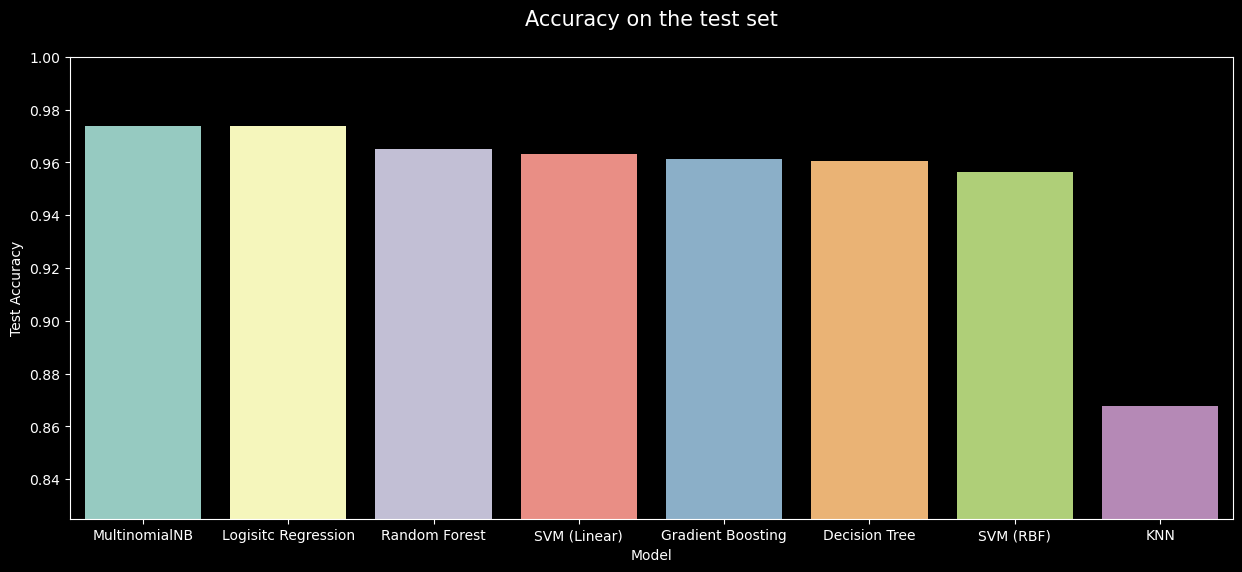

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(x='Model',y='Test Accuracy',data = df_accuracy)
plt.title('Accuracy on the test set\n',fontsize=15)
plt.ylim(0.825,1)
plt.show()

In [15]:
# Visualize the training times for each model using a bar plot

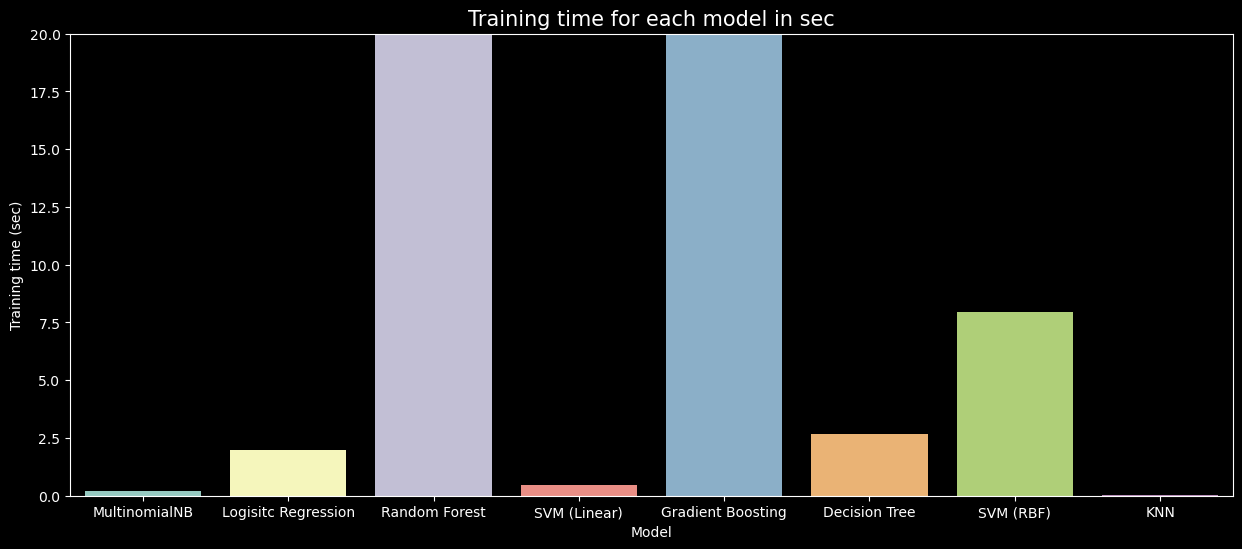

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(x='Model',y='Training time (sec)',data = df_accuracy)
plt.title('Training time for each model in sec',fontsize=15)
plt.ylim(0,20)
plt.show()

In [16]:
# Perform hyperparameter tuning for MultinomialNB using GridSearchCV

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [47]:
parameters = {'alpha':[0.2,1,2,5,10],'fit_prior' : [True,False]}
grid = GridSearchCV(MultinomialNB(),param_grid=parameters)
grid.fit(x_train,y_train)
df_results = pd.DataFrame(grid.cv_results_)
df_results = df_results[['params','mean_test_score']]
df_results.sort_values(by='mean_test_score',ascending=False,inplace=True)

In [48]:
print(df_results)

                               params  mean_test_score
0   {'alpha': 0.2, 'fit_prior': True}         0.981625
1  {'alpha': 0.2, 'fit_prior': False}         0.981384
3    {'alpha': 1, 'fit_prior': False}         0.980899
2     {'alpha': 1, 'fit_prior': True}         0.978240
5    {'alpha': 2, 'fit_prior': False}         0.972197
4     {'alpha': 2, 'fit_prior': True}         0.967845
7    {'alpha': 5, 'fit_prior': False}         0.937141
6     {'alpha': 5, 'fit_prior': True}         0.931096
9   {'alpha': 10, 'fit_prior': False}         0.890478
8    {'alpha': 10, 'fit_prior': True}         0.881290


In [50]:
grid.best_params_

{'alpha': 0.2, 'fit_prior': True}

In [17]:
# Train the MultinomialNB model with the best hyperparameters

In [52]:
alpha,fit_prior = grid.best_params_['alpha'], grid.best_params_['fit_prior']
model = MultinomialNB(alpha=alpha)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [18]:
# Print the classification report and accuracy score of the MultinomialNB model

In [55]:
print(classification_report(y_test,y_pred))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)*100,'%')

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       732
        spam       0.96      0.96      0.96       303

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

Accuracy : 97.5 %


In [19]:
# Define a function to display the predicted labels for a given DataFrame

In [56]:
def display_result(df,number=2):
    for i in range(number):
        msg = df['Text'].iloc[i]
        label = df['Label'].iloc[i]
        
        msg_vec = cv.transform([msg])
        pred_label = model.predict(msg_vec)
        print('Real:',label,'Predicted:',pred_label[0])
        print('Email:',msg)

In [20]:
# Display the predicted labels for some examples from the ham and spam emails

In [57]:
df_spam = df[df['Label']=='spam']
df_ham = df[df['Label']=='ham']

In [63]:
display_result(df_ham,6)

Real: ham Predicted: ham
Email: enron methanol meter this is a follow up to the note i gave you on monday preliminary flow data provided by daren please override pop daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes
Real: ham Predicted: ham
Email: hpl nom for january see attached file hplnol xls hplnol xls
Real: ham Predicted: ham
Email: neon retreat ho ho ho we re around to that most wonderful time of the year neon leaders retreat time i know that this time of year is extremely hectic and that it tough to think about anything past the holidays but life does go on past the week of december through january and that what i d like you to think about for a minute on the calender that i handed out at the beginning of the fall semester the retreat was scheduled for the weekend of january but because of a youth ministers conference that brad and dustin are connected with that week we re going to change the d